# Statistical Analysis of Medicare Claims Data: Inferential Statistics Project 
#### This project analyses different types of payment claims from Medicare for Diabetes and Renal Disease across different demographic groups in the population including male and female belonging to 'White', 'Black', 'Hispanic', and 'Unknown'. It estimates population parameters from observed sample statistic based on Hypothesis Testing and Confidence Interval. This project uses statistical and mathematical libraries from python.
Medicare is a national health insurance program in the United States, begun in 1966 under the Social Security Administration and now administered by the Centers for Medicare and Medicaid Services. (https://en.wikipedia.org/wiki/Medicare_(United_States)). 

The data for the project has been gathered from the website (https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF). The data on the website is split into 20 different sample files due to size limitations. In this project, all the 20 sample csv files have been imported and read into a Pandas DataFrame. The dataframes further have been concatenated to form the complete population. Python libraries such as Matplotlib and Seaborn have been used for visualizing the population data to look for any trends in the claims across different demographic groups. From the population, simple random samples have been generated using the python program and inferential statistics has been used to estimate population parameters.

<b>Code Book</b>: The data files columns have abbreviated names and codes such as for Male and Female etc. These have been expanded in dataframes using code book made available for by CMS at: https://www.cms.gov/files/document/de-10-codebook.pdf-0 In this code book in CMS Beneficiary (BEN) Summary, in column (Variable Name) BENE_SEX_IDENT_CD code 1 is used for Male and code 2 is used for Female.

<b>Disclaimer:</b> As per CMS: "All variables in theDE-SynPUF are imputed/suppressed/coarsened as part of disclosure treatment". "They are all synthetic beneficiaries meant to represent actual beneficiaries". "File (DE-SynPUF) was designed to create new type of file that would be useful for data entrepreneurs for software and application development and training purposes".

<b>Project:</b> This project is an effort to showcase what I learnt from the Specialization course on Statistics with Python from the University of Michigan on Coursera by building a project of my own.

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import statsmodels.api as sm
import scipy.stats.distributions as dist

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Importing medicare data

Data for the year 2008 as downloaded from the website comprises of 20 different csv files as samples, these files are parts of entire population data. Therefore, we import all the 20 csv files and then concatenate them to make the entire population data set. Sample files are imported from csv files into Pandas DataFrame.

In [2]:
df1 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv')

In [3]:
df1.head() #Checking first 5 rows of some sample files before concatenation

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0


In [4]:
df2 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_2.csv')

In [5]:
df2.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00000B48BCF4AD29,19230901,NaN,2,5,0,10,260,12,12,0,0,1,1,1,1,2,1,1,1,1,2,1,81000.0,3072.0,0.0,1520.0,80.0,0.0,6260.0,1520.0,0.0
1,0000525AB30E4DEF,19201001,NaN,2,1,0,31,300,12,12,0,12,1,1,1,2,1,2,1,1,2,2,1,13260.0,2048.0,0.0,1760.0,670.0,0.0,3830.0,1010.0,50.0
2,00009C897C3D8372,19320101,NaN,1,1,Y,7,70,12,12,12,12,1,1,1,1,1,1,1,1,2,1,2,37500.0,4096.0,0.0,100.0,160.0,0.0,1540.0,280.0,60.0
3,0001168CE43BE51B,19340901,NaN,2,1,0,6,200,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0002E494BC87CE10,19140701,NaN,1,2,0,5,200,2,2,12,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df3 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_3.csv')
df3.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0000141F2FECE9BC,19740401,NaN,2,1,0,39,560,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000B27E77EE1987,19550201,NaN,1,1,0,32,80,12,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000C1386AE2C2A2,19591101,NaN,2,5,0,45,830,12,12,0,12,2,2,2,2,2,2,1,1,2,2,2,0.0,0.0,0.0,60.0,0.0,0.0,2400.0,820.0,0.0
3,0000EC65FBF94AB8,19370401,NaN,1,1,0,4,560,12,12,12,12,2,1,2,2,1,1,1,2,2,2,2,0.0,0.0,0.0,2600.0,960.0,0.0,1110.0,290.0,0.0
4,00020C9F73FD7F45,19430601,NaN,2,1,0,14,530,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df4 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_4.csv')
df4.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0000D684F621DFBD,19380901,NaN,2,1,0,28,270,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,140.0,30.0,0.0,800.0,150.0,0.0
1,0000FC926C37BC5F,19210901,NaN,1,3,0,39,10,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00011C5F15219ACD,19280101,NaN,2,1,0,23,720,12,12,0,12,1,1,2,2,2,2,1,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1540.0,430.0,0.0
3,0001694E47AE68F9,19410201,NaN,1,2,0,25,520,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,1250.0,130.0,0.0,590.0,190.0,50.0
4,0001956E385E312B,19250601,NaN,1,1,0,34,170,11,11,0,0,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,1130.0,20.0,0.0,1170.0,200.0,0.0


In [8]:
df5 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_5.csv')
df5.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0000838E2BBC2ADA,19291101,NaN,2,1,0,45,970,12,12,0,0,1,1,1,2,1,2,1,1,1,1,1,21000.0,2048.0,0.0,2390.0,80.0,0.0,6710.0,2250.0,0.0
1,0001B0072BCFE957,19280601,NaN,2,1,0,5,400,12,12,0,0,1,1,1,2,1,2,1,1,2,1,2,13000.0,3072.0,0.0,700.0,200.0,0.0,490.0,120.0,0.0
2,0001C1282A826D10,19421201,NaN,1,1,0,54,110,12,12,0,12,1,2,2,1,2,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,3490.0,1190.0,0.0
3,000270BDE7154CB6,19441001,NaN,1,2,0,44,380,12,12,0,0,2,1,1,2,2,1,1,1,1,1,2,0.0,0.0,0.0,1000.0,200.0,0.0,1350.0,490.0,450.0
4,00035F17586E6A10,19400101,NaN,2,1,0,5,530,12,12,0,11,1,2,2,2,2,1,2,2,2,2,2,0.0,0.0,0.0,780.0,330.0,0.0,810.0,170.0,0.0


In [9]:
df6 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_6.csv')
df6.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0001F555EF57602A,19410701,NaN,2,1,0,32,240,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0003021C3025EF55,19350301,NaN,2,1,0,24,500,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,80.0,20.0,0.0
2,0003C83D2A47B2B9,19400901,NaN,1,2,0,45,610,12,12,0,12,1,2,2,2,2,1,2,2,2,2,2,0.0,0.0,0.0,2880.0,530.0,0.0,1180.0,160.0,0.0
3,0003F63CD84E54A3,19320701,NaN,2,1,0,10,470,12,12,0,0,2,2,2,2,2,2,1,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,960.0,270.0,0.0
4,00052028A33302D3,19140301,NaN,2,2,0,1,360,12,12,0,12,1,2,2,2,2,1,2,1,1,2,2,0.0,0.0,0.0,460.0,20.0,0.0,1290.0,410.0,0.0


In [10]:
df7 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_7.csv')
df8 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_8.csv')
df9 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_9.csv')
df10 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_10.csv')
df11 =  pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_11.csv')
df12 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_12.csv')
df13 =  pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_13.csv')
df14 =  pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_14.csv')
df15 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_15.csv')
df16 =  pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_16.csv')
df17 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_17.csv')
df18 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_18.csv')
df19 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_19.csv')
df20 = pd.read_csv('DE1_0_2008_Beneficiary_Summary_File_Sample_20.csv')

In [11]:
# Concatenating all the 20 samples DataFrames to combine into one population data
final_df = pd.concat([df1,df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20])

In [12]:
# After concatenation of files it is important to reset the index
final_df.reset_index(drop=True, inplace = True)

In [13]:
final_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0


In [14]:
final_df.tail()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
2326851,FFFD8472E348E5A5,19320501,NaN,1,1,0,50,160,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2326852,FFFDAE0529142D0C,19330601,NaN,1,1,0,36,310,12,12,0,0,2,1,2,1,2,2,1,1,2,2,2,10000.0,1024.0,0.0,630.0,390.0,0.0,1740.0,710.0,0.0
2326853,FFFDE6371A8EAF51,19401101,NaN,2,1,0,5,200,12,12,0,12,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,370.0,100.0,0.0,800.0,230.0,0.0
2326854,FFFDF515B7CD464E,19261101,NaN,1,1,0,5,510,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,180.0,60.0,0.0
2326855,FFFE6F53545F974E,19210801,NaN,2,1,0,36,10,12,12,0,12,2,2,2,2,2,2,1,1,2,1,2,0.0,0.0,0.0,850.0,700.0,0.0,2580.0,710.0,140.0


In [15]:
final_df.shape #checking the size of dataframe to find out the number of rows and number of columns present

(2326856, 32)

### DATA WRANGLING:

In [16]:
# Renaming the columns of the DataFrame
column_names = {"BENE_BIRTH_DT":"birthday", "BENE_DEATH_DT":"deathday", "BENE_SEX_IDENT_CD":"sex",
               "BENE_RACE_CD":"race", "BENE_ESRD_IND":"renal_disease", "SP_STATE_CODE":"state",
               "BENE_COUNTY_CD":"county", "BENE_HI_CVRAGE_TOT_MONS":"partA", 
               "BENE_SMI_CVRAGE_TOT_MONS":"partB", "BENE_HMO_CVRAGE_TOT_MONS":"hmo",
               "PLAN_CVRG_MOS_NUM":"partD", "SP_ALZHDMTA":"alzheimer", "SP_CHF":"heart_failure",
               "SP_CHRNKIDN":"kidney_disease", "SP_CNCR":"cancer", "SP_COPD":"pulmanory_disease",
               "SP_DEPRESSN":"depression","SP_DIABETES":"diabetes","SP_ISCHMCHT":"ismechic_hearth",
               "SP_OSTEOPRS":"osteoporosis", "SP_RA_OA":"rheumatoid","SP_STRKETIA":"stroke"}
final_df.rename(columns = column_names, inplace = True)

In [17]:
final_df.head()

,DESYNPUF_ID,birthday,deathday,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0


In [18]:
final_df.info() #Checking the information about the dataframe and the datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326856 entries, 0 to 2326855
Data columns (total 32 columns):
DESYNPUF_ID          object
birthday             int64
deathday             float64
sex                  int64
race                 int64
renal_disease        object
state                int64
county               int64
partA                int64
partB                int64
hmo                  int64
partD                int64
alzheimer            int64
heart_failure        int64
kidney_disease       int64
cancer               int64
pulmanory_disease    int64
depression           int64
diabetes             int64
ismechic_hearth      int64
osteoporosis         int64
rheumatoid           int64
stroke               int64
MEDREIMB_IP          float64
BENRES_IP            float64
PPPYMT_IP            float64
MEDREIMB_OP          float64
BENRES_OP            float64
PPPYMT_OP            float64
MEDREIMB_CAR         float64
BENRES_CAR           float64
PPPYMT_CAR           float64
d

In [19]:
final_df.drop('DESYNPUF_ID', axis = 1, inplace = True) #Dropping the ID column

In [20]:
final_df.head() #checking the first 5 rows to confirm that the DESYNPUF_ID column has been dropped

,birthday,deathday,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0
1,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0
2,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0


In [21]:
# changing birthday information into dob of year-month-date format
final_df['dob'] = pd.to_datetime(final_df['birthday'], format='%Y%m%d', errors='ignore')

In [22]:
final_df.head() #Checking the first 5 rows of the data frame.

,birthday,deathday,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob
0,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01
1,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01
2,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01
3,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01
4,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01


In [23]:
#Creating a Year column by extracting the year out of 'dob' column
final_df['Year'] = pd.DatetimeIndex(final_df['dob']).year

In [24]:
final_df.head() # Checking first 5 rows of the data frame

,birthday,deathday,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year
0,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923
1,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943
2,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936
3,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941
4,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936


In [25]:
# Calculating Age of the indivudal in the year 2008
final_df['Age'] = 2008 - final_df['Year'] # Since the samples were collected in 2008, the age has been calculated for that year

In [26]:
final_df.head()

,birthday,deathday,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age
0,19230501,NaN,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85
1,19430101,NaN,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65
2,19360901,NaN,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72
3,19410601,NaN,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67
4,19360801,NaN,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72


In [27]:
final_df.drop(['birthday', 'deathday'], axis =1, inplace = True) #Dropping birthday and deathday

In [28]:
final_df.head()

,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age
0,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85
1,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65
2,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72
3,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67
4,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72


In [29]:
final_df['race1'] = final_df.race.replace({1: 'White', 2: 'Black', 3: 'Hispanic', 5: 'Unknown'})
# Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4195038/
final_df.head()

,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age,race1
0,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85,White
1,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65,White
2,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72,White
3,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67,Unknown
4,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72,White


In [30]:
# Checking the number of individuals in different ethnic groups
final_df['race1'].value_counts()

White       1926708
Black        247723
Hispanic      97972
Unknown       54453
Name: race1, dtype: int64

In [31]:
final_df['sex1'] = final_df['sex'].replace({1: 'Male', 2: 'Female'})
final_df.head()

,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age,race1,sex1
0,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85,White,Male
1,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65,White,Male
2,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72,White,Female
3,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67,Unknown,Male
4,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72,White,Male


In [32]:
#Checking number of females and males
#Refer CMS code book: Page 13 of https://www.cms.gov/files/document/de-10-codebook.pdf-0 for BEN-4.
final_df['sex1'].value_counts()

Female    1292861
Male      1033995
Name: sex1, dtype: int64

The above data of Female and Male beneficiaries matches the data provided by CMS code book refered above.

##### Medicare Billing Terminology:
* Inpatient: Inpatient care occurs when a person has a stay at a healthcare facility for more than 24 hours.
* Outpatient: This term refers to healthcare treatment that doesn’t require an overnight hospital stay, including a routine visit to a primary care doctor or a non-invasive surgery.
* Carrier: Carriers are private insurance companies acting under contract with the Health Care Financing Administration (HCFA) to process claims by beneficiaries and providers for services or supplies covered under Medicare.

In [33]:
#Calculating total inpatient payment 
final_df['tot_inpatient'] = final_df['MEDREIMB_IP'] + final_df['BENRES_IP'] + final_df['PPPYMT_IP']

# Calculating total Outpatient payment 
final_df['tot_outpatient'] = final_df['MEDREIMB_OP'] + final_df['BENRES_OP'] + final_df['PPPYMT_OP']

# Calculating total Carrier payment 
final_df['tot_carrier'] = final_df['MEDREIMB_CAR'] + final_df['BENRES_CAR'] + final_df['PPPYMT_CAR']

In [34]:
final_df.head()

,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age,race1,sex1,tot_inpatient,tot_outpatient,tot_carrier
0,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85,White,Male,0.0,60.0,0.0
1,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65,White,Male,0.0,0.0,940.0
2,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72,White,Female,0.0,0.0,0.0
3,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67,Unknown,Male,0.0,0.0,0.0
4,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72,White,Male,0.0,70.0,300.0


In [35]:
#Replacing column values in renal disease column, note that originally the values are 'Y' and '0'.
final_df['renal_disease1'] = final_df['renal_disease'].replace({'Y': "Yes", '0': "No"})
final_df.head()

,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age,race1,sex1,tot_inpatient,tot_outpatient,tot_carrier,renal_disease1
0,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85,White,Male,0.0,60.0,0.0,No
1,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65,White,Male,0.0,0.0,940.0,No
2,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72,White,Female,0.0,0.0,0.0,No
3,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67,Unknown,Male,0.0,0.0,0.0,No
4,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72,White,Male,0.0,70.0,300.0,No


In [36]:
#Checking number of people who have renal disease
final_df['renal_disease1'].value_counts()

No     2162326
Yes     164530
Name: renal_disease1, dtype: int64

In [37]:
#Replacing values for all the different disease columns from 1 to Yes and 2 to No into new columns
final_df[['alzheimer1', 'heart_failure1', 'kidney_disease1', 'cancer1', 'pulmanory_disease1', 'depression1', 'diabetes1', 'ismechic_hearth1', 'osteoporosis1', 'rheumatoid1','stroke1']] = final_df[['alzheimer', 'heart_failure', 'kidney_disease', 'cancer', 'pulmanory_disease', 'depression', 'diabetes', 'ismechic_hearth', 'osteoporosis', 'rheumatoid','stroke']].replace({1: 'Yes', 2: 'No'})
final_df.head()

,sex,race,renal_disease,state,county,partA,partB,hmo,partD,alzheimer,heart_failure,kidney_disease,cancer,pulmanory_disease,depression,diabetes,ismechic_hearth,osteoporosis,rheumatoid,stroke,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age,race1,sex1,tot_inpatient,tot_outpatient,tot_carrier,renal_disease1,alzheimer1,heart_failure1,kidney_disease1,cancer1,pulmanory_disease1,depression1,diabetes1,ismechic_hearth1,osteoporosis1,rheumatoid1,stroke1
0,1,1,0,26,950,12,12,12,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85,White,Male,0.0,60.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No
1,1,1,0,39,230,12,12,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65,White,Male,0.0,0.0,940.0,No,No,No,No,No,No,No,No,No,No,No,No
2,2,1,0,39,280,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72,White,Female,0.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No
3,1,5,0,6,290,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67,Unknown,Male,0.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No
4,1,1,0,52,590,12,12,0,0,2,2,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72,White,Male,0.0,70.0,300.0,No,No,No,No,No,No,No,No,No,Yes,No,No


In [38]:
#Dropping the old columns for diseases
final_df.drop(['alzheimer', 'heart_failure', 'kidney_disease', 'cancer', 'pulmanory_disease', 'depression', 'diabetes', 'ismechic_hearth', 'osteoporosis', 'rheumatoid','stroke', 'renal_disease', 'sex'], axis =1, inplace =True)
final_df.head()

,race,state,county,partA,partB,hmo,partD,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,dob,Year,Age,race1,sex1,tot_inpatient,tot_outpatient,tot_carrier,renal_disease1,alzheimer1,heart_failure1,kidney_disease1,cancer1,pulmanory_disease1,depression1,diabetes1,ismechic_hearth1,osteoporosis1,rheumatoid1,stroke1
0,1,26,950,12,12,12,12,0.0,0.0,0.0,50.0,10.0,0.0,0.0,0.0,0.0,1923-05-01,1923,85,White,Male,0.0,60.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No
1,1,39,230,12,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,240.0,0.0,1943-01-01,1943,65,White,Male,0.0,0.0,940.0,No,No,No,No,No,No,No,No,No,No,No,No
2,1,39,280,12,12,0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936-09-01,1936,72,White,Female,0.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No
3,5,6,290,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941-06-01,1941,67,Unknown,Male,0.0,0.0,0.0,No,No,No,No,No,No,No,No,No,No,No,No
4,1,52,590,12,12,0,0,0.0,0.0,0.0,30.0,40.0,0.0,220.0,80.0,0.0,1936-08-01,1936,72,White,Male,0.0,70.0,300.0,No,No,No,No,No,No,No,No,No,Yes,No,No


In [39]:
#Checking number of people who have diabetes
final_df['diabetes1'].value_counts()

No     1443620
Yes     883236
Name: diabetes1, dtype: int64

In [40]:
#Creating a DataFrame for the patients who were diagnosed with either renal disease or diabetes
rendiab_df = final_df[(final_df['renal_disease1']=='Yes') | (final_df['diabetes1'] == 'Yes')]
rendiab_df = rendiab_df[['renal_disease1', 'diabetes1', 'sex1', 'race1', 'tot_inpatient', 'tot_outpatient', 'tot_carrier', 'Age']]
rendiab_df.head()

,renal_disease1,diabetes1,sex1,race1,tot_inpatient,tot_outpatient,tot_carrier,Age
6,No,Yes,Male,White,0.0,1280.0,4270.0,86
10,No,Yes,Female,White,0.0,0.0,2400.0,74
12,No,Yes,Female,White,0.0,5140.0,5110.0,72
13,No,Yes,Male,White,15024.0,7370.0,10070.0,74
16,No,Yes,Female,Black,6024.0,6890.0,6350.0,89


### Extrapolatory Analysis

We check the distribution of total inpatient, total outpatient and total carrier costs by making a histogram. 

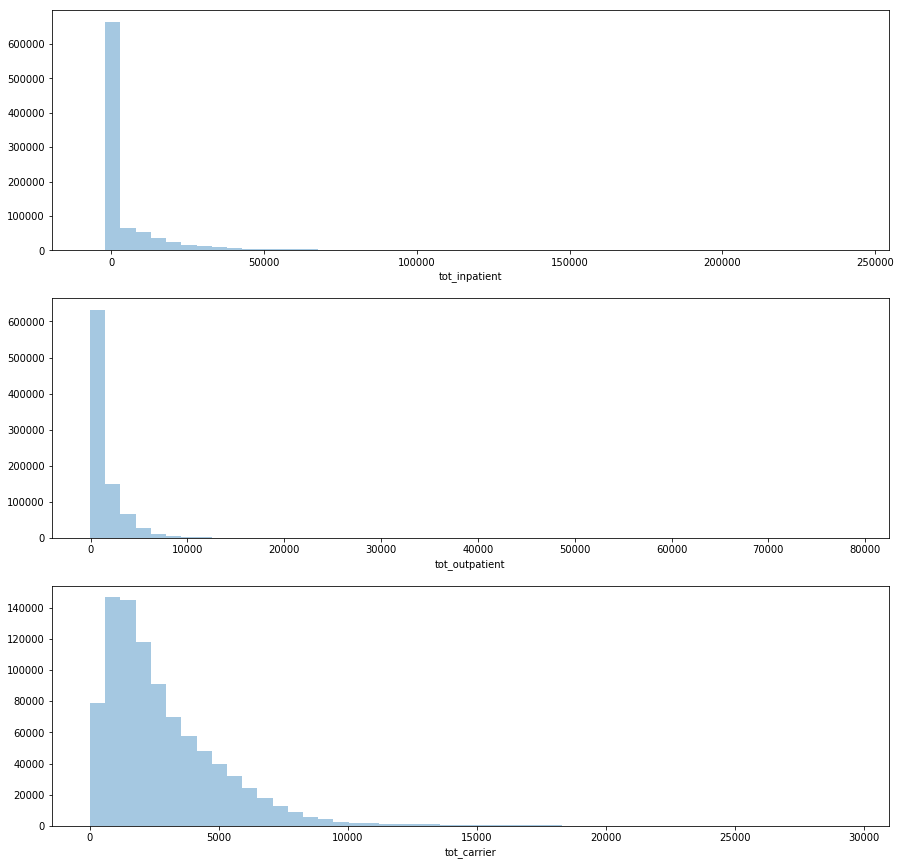

In [41]:
plt.figure(figsize = (15,15))
plt.subplot(3,1,1)
sns.distplot(rendiab_df['tot_inpatient'], kde = False)
plt.subplot(3,1,2)
sns.distplot(rendiab_df['tot_outpatient'], kde = False)
plt.subplot(3,1,3)
sns.distplot(rendiab_df['tot_carrier'], kde = False)

<b>Inference:</b> The total inpatient and total outpatient payment are both skewed right and therefore the mean payment is more than the median, the average payment for both types will be more than the amount paid by less than 50% of the population. Also the variance in the total carrier amount is more than total inpatient and total outpatient payments.

#### Separating dataframes for Diabetese and Renal Disease patients

In [42]:
# Filtering only those patients from rendiab_df dataframe who were diagnosed with diabetes only
#Below is the DataFrame with information of only the diabetic patients
rr = rendiab_df[rendiab_df['diabetes1']=='Yes']
rr = rr[['diabetes1', 'tot_inpatient', 'sex1', 'race1', 'tot_outpatient', 'tot_carrier', 'Age']]

# Filtering only those patients from rendiab_df dataframe who were diagnosed with renal disease only
# Below is the DataFrame with information of the patients diagnosed with renal disease only
rn = rendiab_df[rendiab_df['renal_disease1']=='Yes']
rn = rn[['renal_disease1', 'tot_inpatient', 'sex1', 'race1', 'tot_outpatient', 'tot_carrier', 'Age']]

In [43]:
#diabetes dataframe
rr.head()

,diabetes1,tot_inpatient,sex1,race1,tot_outpatient,tot_carrier,Age
6,Yes,0.0,Male,White,1280.0,4270.0,86
10,Yes,0.0,Female,White,0.0,2400.0,74
12,Yes,0.0,Female,White,5140.0,5110.0,72
13,Yes,15024.0,Male,White,7370.0,10070.0,74
16,Yes,6024.0,Female,Black,6890.0,6350.0,89


In [44]:
#renal_disease dataframe
rn.head()

,renal_disease1,tot_inpatient,sex1,race1,tot_outpatient,tot_carrier,Age
18,Yes,0.0,Female,White,30610.0,24320.0,66
65,Yes,6024.0,Female,White,40.0,2030.0,88
67,Yes,32096.0,Male,Black,1620.0,4150.0,54
81,Yes,0.0,Male,White,1020.0,5150.0,80
84,Yes,5024.0,Female,White,2160.0,3660.0,71


In [45]:
#Statistics of numerical columns of the dataframe of patients having diabetes
rr.describe() 

,tot_inpatient,tot_outpatient,tot_carrier,Age
count,883236.000000,883236.000000,883236.000000,883236.000000
mean,5639.553386,1654.446784,2890.120930,72.764984
std,14016.865805,3372.264424,2410.905649,12.757626
min,-6946.000000,-70.000000,0.000000,25.000000
25%,0.000000,90.000000,1210.000000,67.000000
50%,0.000000,680.000000,2220.000000,74.000000
75%,5024.000000,1930.000000,3960.000000,81.000000
max,242072.000000,78530.000000,29500.000000,99.000000


In [46]:
#Statistics of numerical columns of the dataframe of patients having renal disease 
rn.describe() 

,tot_inpatient,tot_outpatient,tot_carrier,Age
count,164530.000000,164530.000000,164530.000000,164530.000000
mean,11429.024883,3468.183067,4190.676472,72.983395
std,20544.423106,6675.927912,3447.995096,13.100361
min,-6976.000000,-60.000000,0.000000,25.000000
25%,0.000000,220.000000,1760.000000,67.000000
50%,0.000000,1140.000000,3390.000000,74.000000
75%,15048.000000,3230.000000,5550.000000,82.000000
max,234072.000000,78530.000000,29500.000000,99.000000


#### Distribution of total inpatient claims for diabetes and renal disease across different gender groups

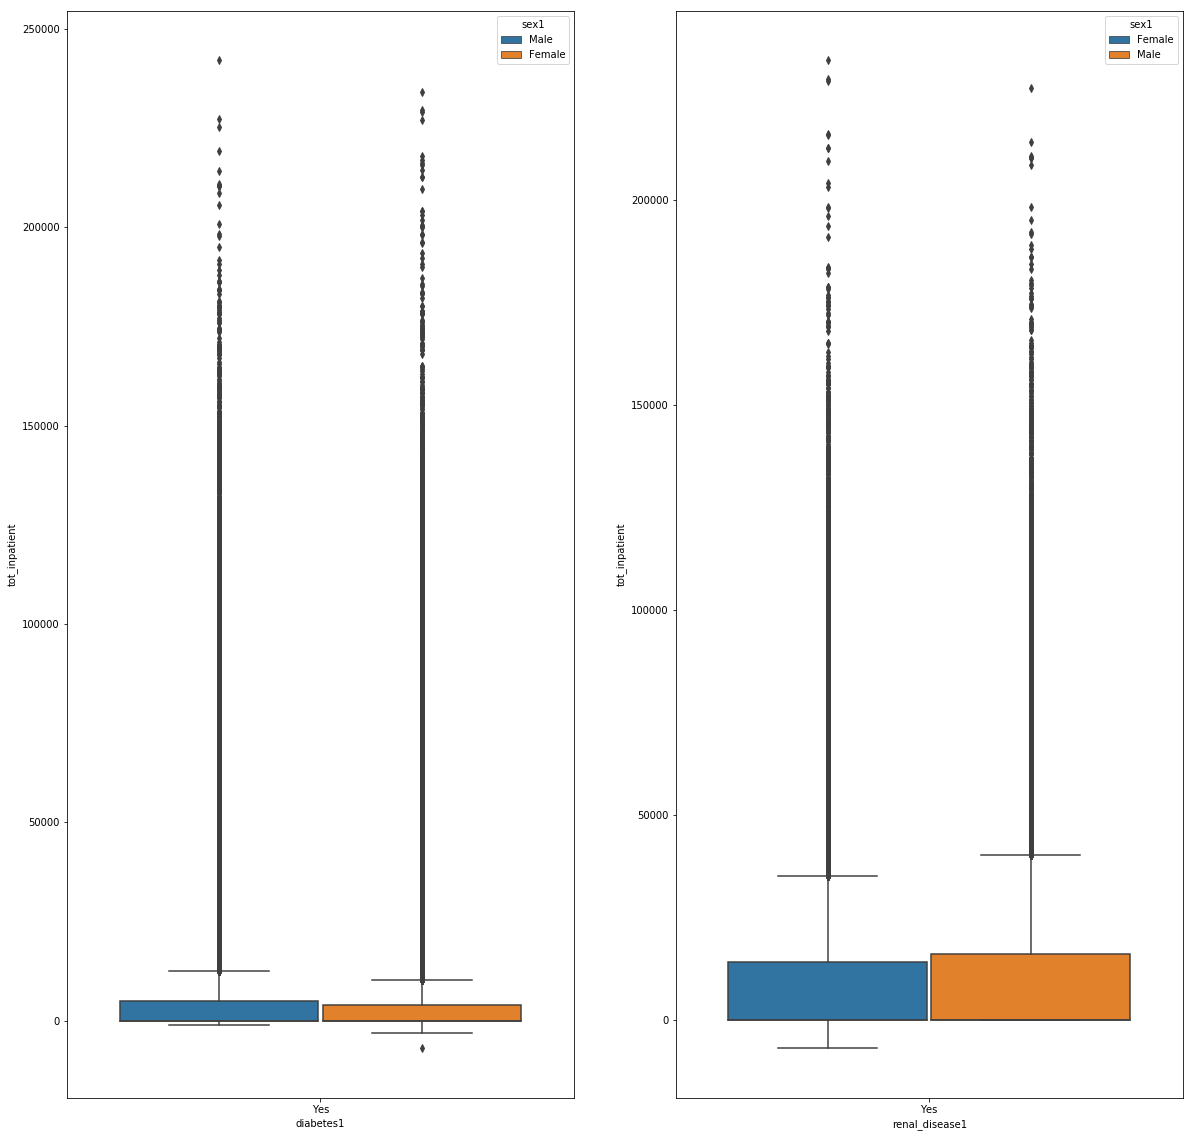

In [47]:
# Distribution of total inpatient claims for patients diagnosed with diabetes 
# across different gender groups: Visualizing with boxplot 
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
sns.boxplot(x = 'diabetes1', y = 'tot_inpatient', hue = 'sex1', data = rr)

# Distribution of total inpatient claims for patients diagnosed with renal disease 
# across different gender groups: Visualizing with boxplot 
plt.subplot(1,2,2)
sns.boxplot(x = 'renal_disease1', y = 'tot_inpatient', hue = 'sex1', data = rn)

<b>Inferences:</b> 
* From the boxplot it is visible that the variation in the total inpatient payment for male population diagnosed with diabetes is more than the female population as the interquartile range (IQR) is bigger for males than for females. 

* The patients diagnosed with renal disease pay more total inpatient fees than the patients diagnosed with diabetes on an average. 

* The male patients diagnosed with renal disease pay more than female patients and the variation in payment in male population diagnosed with renal disease is more than female population as the interquartile range (IQR) is bigger for male population.

#### Distribution of total inpatient claims for diabetes and renal disease across different ethnic groups

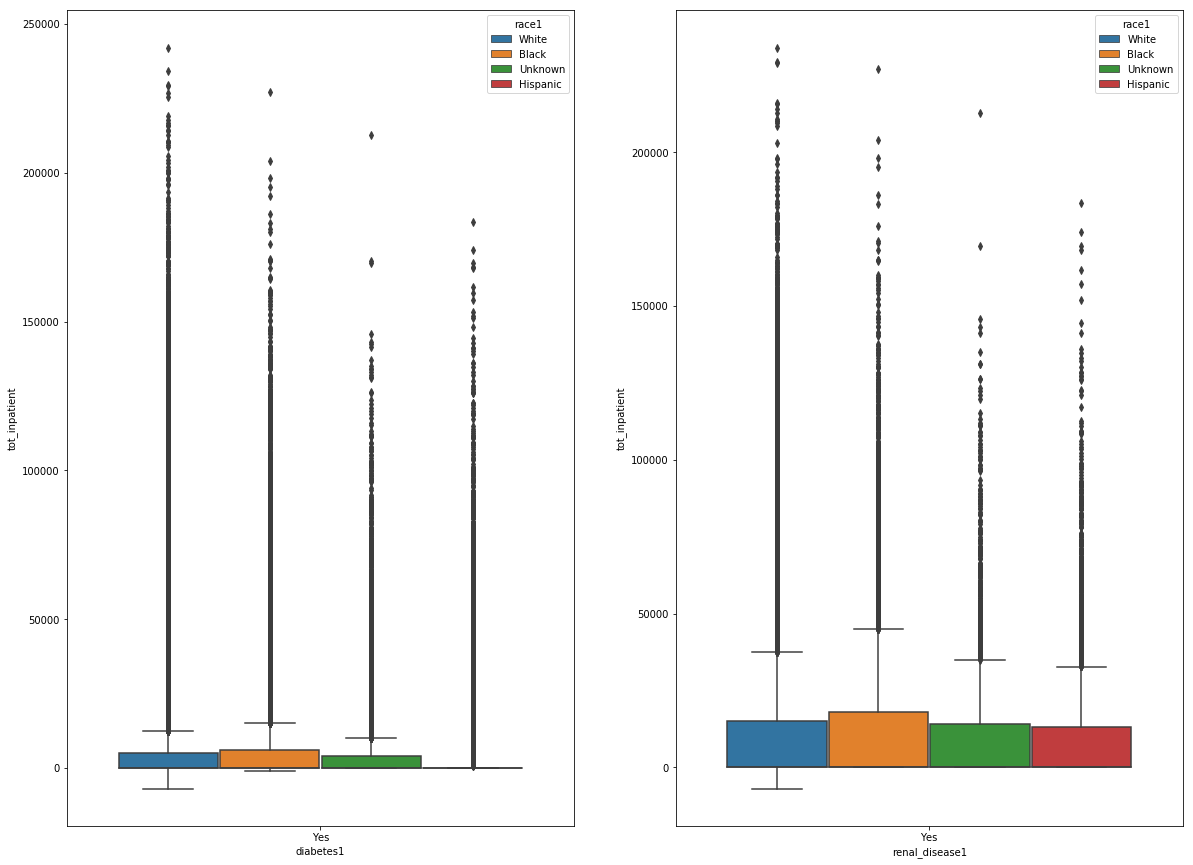

In [48]:
# Distribution of total inpatient claims for patients diagnosed with diabetes 
# across different ethnic groups: Visualizing with boxplot 
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.boxplot(x = 'diabetes1', y = 'tot_inpatient', hue = 'race1', data = rr)

# Distribution of total inpatient claims for patients diagnosed with renal disease 
# across different ethnic groups: Visualizing with boxplot 
plt.subplot(1,2,2)
sns.boxplot(x = 'renal_disease1', y = 'tot_inpatient', hue = 'race1', data = rn)

<b>Inferences:</b> 
* On an average the black population are paying more total inpatient fees for Diabetes and renal disease as compared to other ethnic groups. 
* Also the variation in the payment for black population is more spread out as can be seen from the Interquartile range (IQR). 
* The hispanic and other groups seems to pay less total inpatient fees for diabetes but higher for renal disease. However, the population of hispanic and other unknown groups is also comparatively less.

#### Population of ethnic groups diagnosed with diabetes and renal disease

In [49]:
# Polulation of different ethnic groups who are diagnosed with diabetes.
rr['race1'].value_counts()

White       746768
Black        86838
Hispanic     30828
Unknown      18802
Name: race1, dtype: int64

In [50]:
# Polulation of different ethnic groups who are diagnosed with renal disease.
rn['race1'].value_counts()

White       137864
Black        17629
Hispanic      5465
Unknown       3572
Name: race1, dtype: int64

#### Average total inpatient, outpatient, and carrier payments for diabetes and renal disease by different ethnic groups

In [51]:
#Average total inpatient, outpatient, and carrier payments by different ethnic groups for diabetes
rr.groupby('race1')['tot_inpatient', 'tot_outpatient','tot_carrier'].mean() 

,tot_inpatient,tot_outpatient,tot_carrier
race1,,,
Black,6429.740436,1815.761648,2929.979502
Hispanic,4849.099196,1580.405476,2695.838523
Unknown,5252.755664,1756.572173,2846.166365
White,5590.036574,1636.173537,2894.612999


In [52]:
#Average total inpatient, outpatient, and carrier payments by different ethnic groups for renal disease
rn.groupby('race1')['tot_inpatient', 'tot_outpatient','tot_carrier'].mean() 

,tot_inpatient,tot_outpatient,tot_carrier
race1,,,
Black,13049.470532,4053.748936,4424.195360
Hispanic,10543.515828,3570.658737,4067.879231
Unknown,10978.000560,3758.549832,4196.805711
White,11268.602507,3381.719883,4165.524793


<b>Inference:</b> The total inpatient fees is greater than the total outpatient fees on an average which makes sense as the person does not need to get hospitalized for treatment. 

#### Distribution of Outpatient claims: Across gender groups

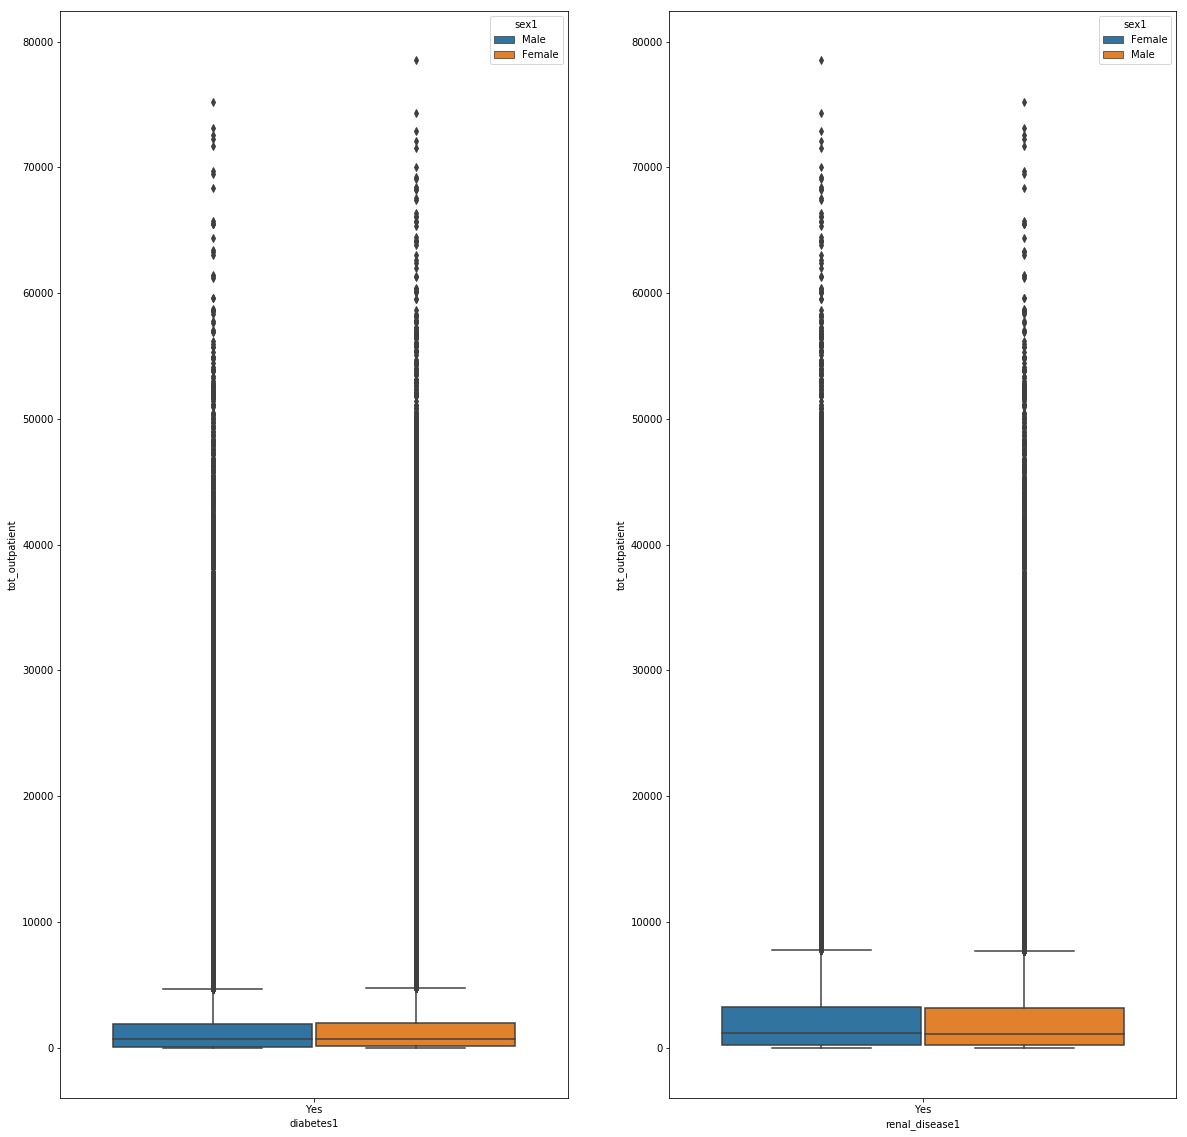

In [53]:
# Distribution of total outpatient claims for patients diagnosed with diabetes 
# across different gender groups: Visualizing with boxplot 
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
sns.boxplot(x = 'diabetes1', y = 'tot_outpatient', hue = 'sex1', data = rr)

# Distribution of total outpatient claims for patients diagnosed with renal disease 
# across different gender groups: Visualizing with boxplot 
plt.subplot(1,2,2)
sns.boxplot(x = 'renal_disease1', y = 'tot_outpatient', hue = 'sex1', data = rn)


<b>Inferece:</b> 
* The distribution of both male and female population is similar for outpatient payment for both diabetes and renal disease. 
* However, the outpatient fees for renal disease is much larger than diabetes.

#### Distribution of Outpatient claims: Across ethnic groups

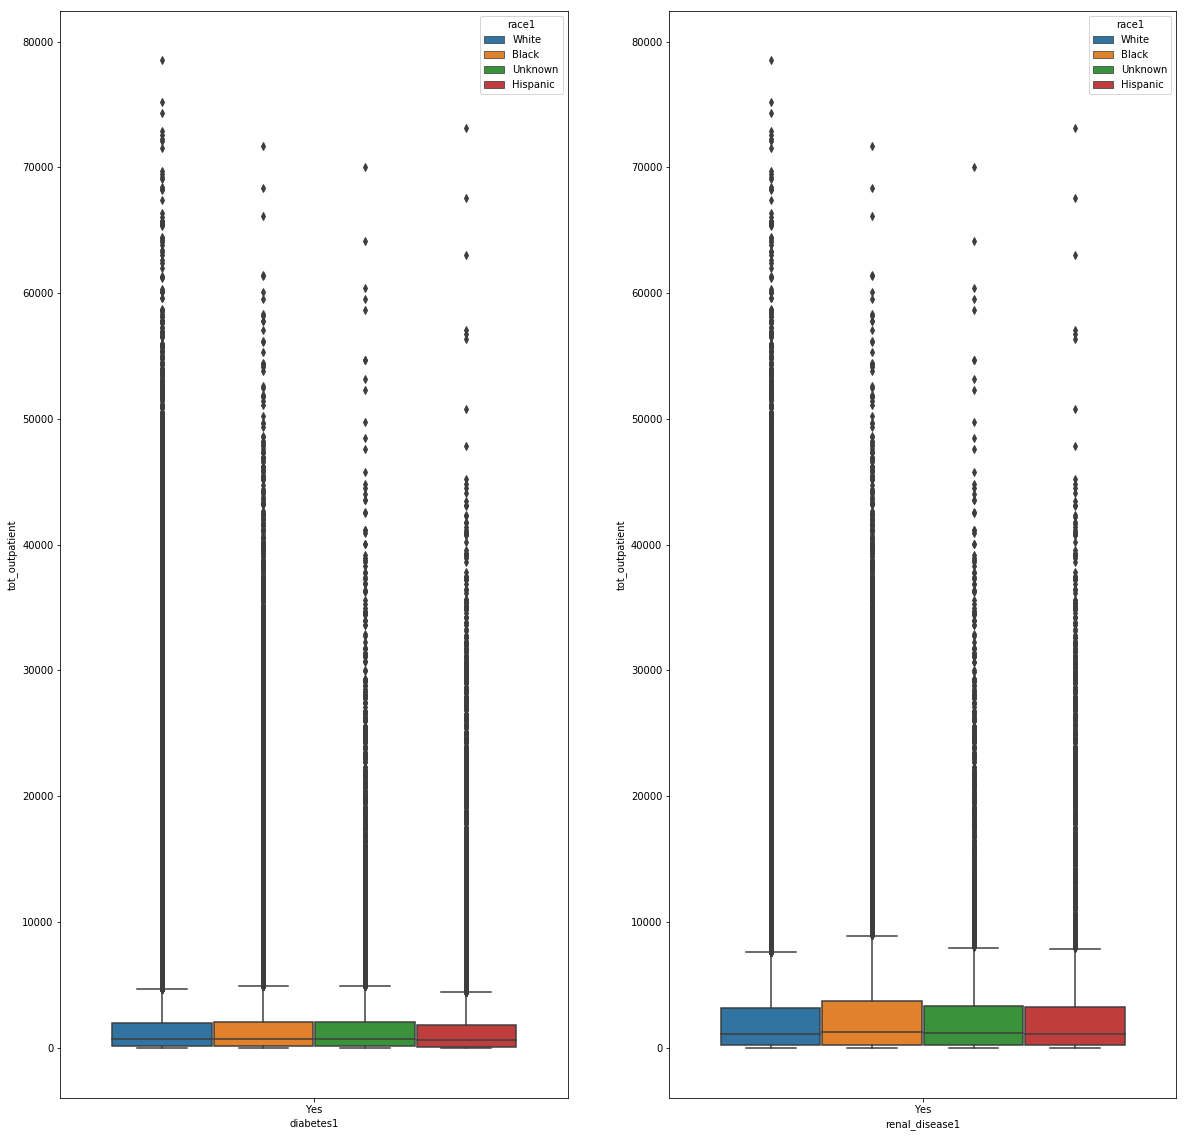

In [54]:
# Distribution of total outpatient claims for patients diagnosed with diabetes 
# across different ethnic groups: Visualizing with boxplot 
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
sns.boxplot(x = 'diabetes1', y = 'tot_outpatient', hue = 'race1', data = rr)

# Distribution of total outpatient claims for patients diagnosed with renal disease 
# across different ethnic groups: Visualizing with boxplot 
plt.subplot(1,2,2)
sns.boxplot(x = 'renal_disease1', y = 'tot_outpatient', hue = 'race1', data = rn)

<b>Inferece:</b> Across different ethnic groups, the black population has a greater variation in the outpatient cost for renal disease.

#### Distribution of Carrier claims: Across gender groups

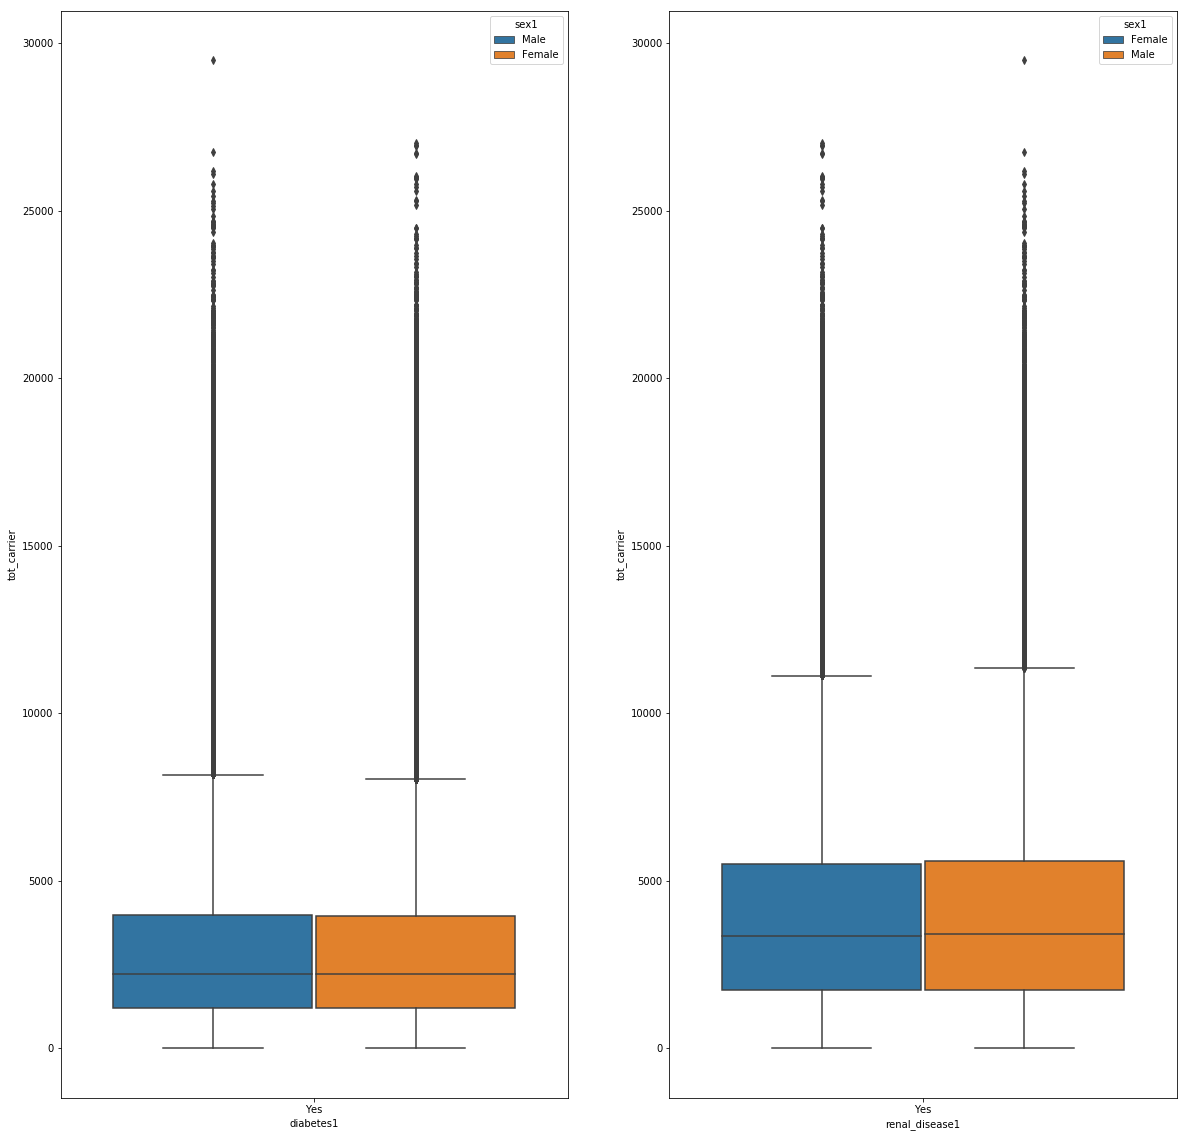

In [55]:
# Distribution of total carrier claims for patients diagnosed with diabetes 
# across different gender groups: Visualizing with boxplot 
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
sns.boxplot(x = 'diabetes1', y = 'tot_carrier', hue = 'sex1', data = rr)

# Distribution of total carrier claims for patients diagnosed with renal disease 
# across different gender groups: Visualizing with boxplot 
plt.subplot(1,2,2)
sns.boxplot(x = 'renal_disease1', y = 'tot_carrier', hue = 'sex1', data = rn)

<b>Inference:</b> 
* Total carrier payment seems to be more for the patients diagnosed with renal disease than those with diabetes. 
* Also the total carrier payment seems to be more than total outpatient payment but less than total inpatient payment on an average.

#### Comparing count of male and female having diabetes and renal disease

In [56]:
# Polulation of different gender groups who are diagnosed with diabetes.
rr['sex1'].value_counts()

Female    515501
Male      367735
Name: sex1, dtype: int64

In [57]:
# Polulation of different gender groups who are diagnosed with renal disease.
rn['sex1'].value_counts()

Female    95201
Male      69329
Name: sex1, dtype: int64

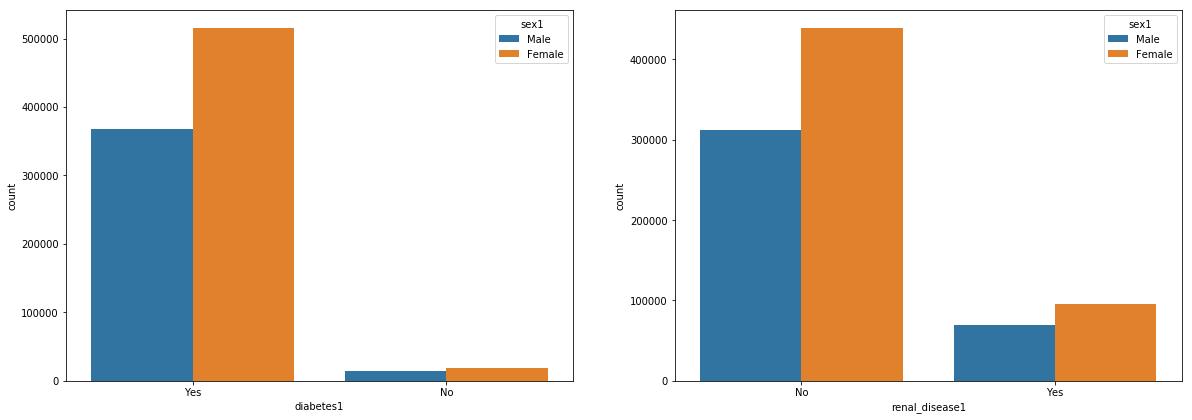

In [58]:
# Comparing number of individuals across different gender groups
# who were diagnosed with diabetes and renal disease: Using countplot
rd = rendiab_df[['diabetes1', 'renal_disease1', 'sex1', 'race1']]
plt.figure(figsize =(20,15))
plt.subplot(2,2,1)
sns.countplot(rd['diabetes1'], hue = 'sex1', data = rd)
plt.subplot(2,2,2)
sns.countplot(rd['renal_disease1'], hue = 'sex1', data = rd)

<b>Inference:</b> 
* From bar plot it is evident that in the year 2008 more people are diagnosed with diabetes than renal disease. 
* The number of female patients in both the disease groups outnumbers the amount of male patients.

#### Comparing count of individuals of different ethnic groups having diabetes and renal disease

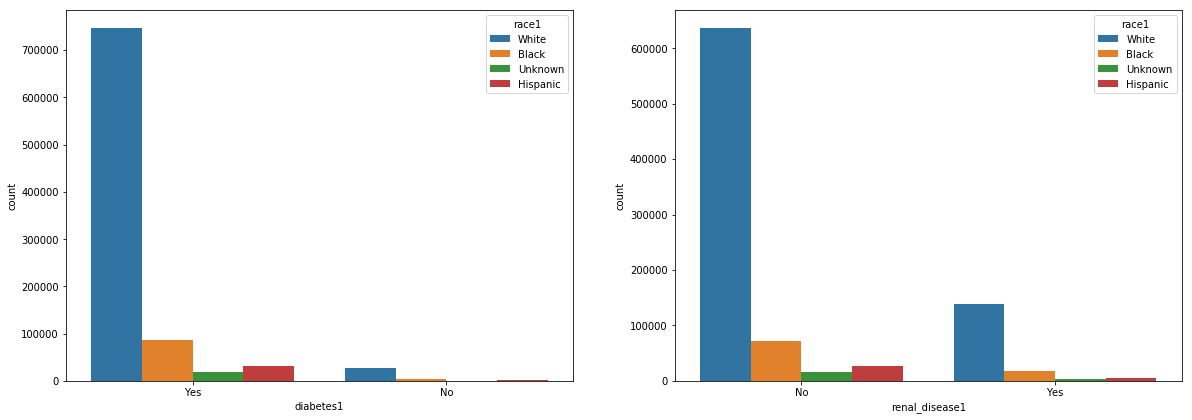

In [59]:
# Comparing number of individuals across different ethnic groups
# who were diagnosed with diabetes and renal disease: Using countplot
plt.figure(figsize =(20,15))
plt.subplot(2,2,1)
sns.countplot(rd['diabetes1'], hue= 'race1', data = rd)
plt.subplot(2,2,2)
sns.countplot(rd['renal_disease1'], hue = 'race1', data = rd)

<b>Inference:</b> 
* It seems like the white ethnic group is largely diagnosed with both diabetes and renal disease compared to other ethnic groups. 
* Also, the black population diagnosed with diabetes is more in number than the black population diagnosed with renal disease.

#### Plot to show how the total inpatient claims for diabetes vary with age across different ethnic and gender groups

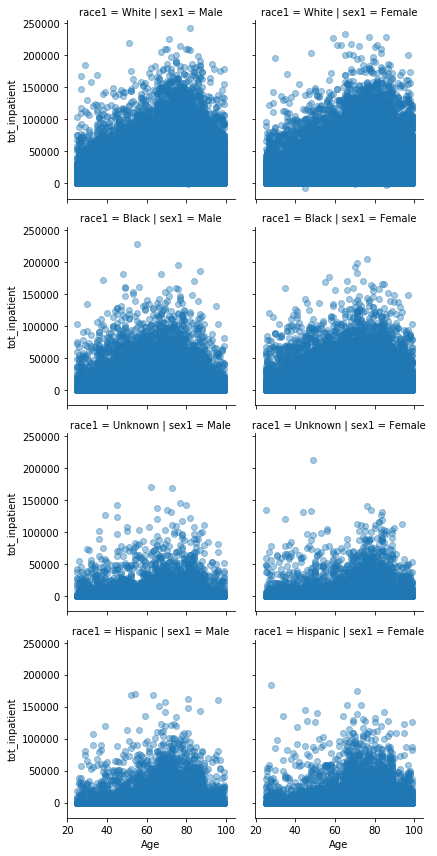

In [60]:
sns.FacetGrid(rr, col="sex1", row = 'race1').map(plt.scatter, "Age", "tot_inpatient", alpha=0.4).add_legend()

#### Plot to show how the total inpatient claims for renal disease vary with age across different ethnic and gender groups

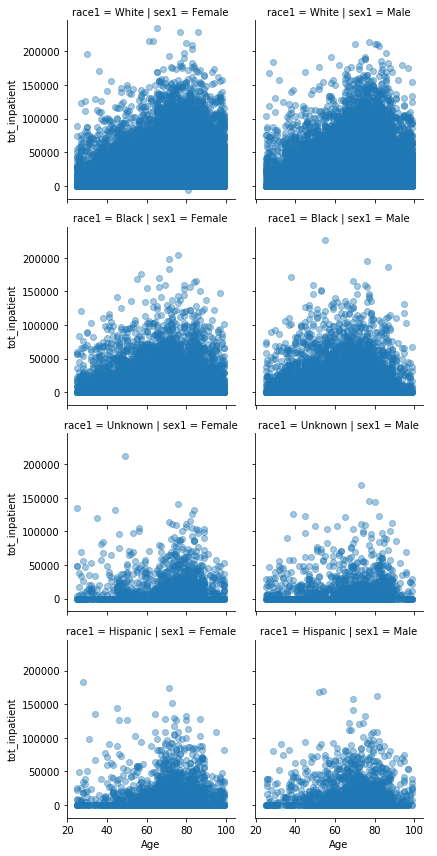

In [61]:
sns.FacetGrid(rn, col="sex1", row = 'race1').map(plt.scatter, "Age", "tot_inpatient", alpha=0.4).add_legend()

<b>Inference:</b> It seems like total inpatient payment claims tend to increase with age but there are a lot more white patients followed by black patients than other ethnic groups.

# Estimating Population parameters from the sample

In [62]:
#Checking size of dataframe that consists of information about patients
#that were diagnosed with either diabetes or renal disease.
rendiab_df.shape[0] 

915898

#### Creating Sample from the population

In [63]:
rd_sample = rendiab_df.sample(int(rendiab_df.shape[0]*0.1))
rd_sample.shape

(91589, 8)

In [64]:
rd_sample.reset_index(drop=True, inplace=True)

In [65]:
rd_sample.tail() #Checking the last 5 rows of the dataframe that is sampled from the population

,renal_disease1,diabetes1,sex1,race1,tot_inpatient,tot_outpatient,tot_carrier,Age
91584,No,Yes,Female,White,1424.0,500.0,2070.0,83
91585,No,Yes,Female,White,0.0,3330.0,3620.0,65
91586,No,Yes,Male,Black,25072.0,1320.0,1710.0,87
91587,No,Yes,Female,White,7024.0,150.0,540.0,67
91588,No,Yes,Female,White,0.0,1950.0,2540.0,65


In [66]:
rendiab_df.describe() #Checking statistics of numerical columns of the entire population dataframe

,tot_inpatient,tot_outpatient,tot_carrier,Age
count,915898.000000,915898.000000,915898.000000,915898.000000
mean,5612.260985,1637.475046,2861.393594,72.754053
std,13968.137632,3336.713706,2395.219953,12.762158
min,-6976.000000,-70.000000,0.000000,25.000000
25%,0.000000,90.000000,1190.000000,67.000000
50%,0.000000,670.000000,2190.000000,74.000000
75%,5024.000000,1910.000000,3920.000000,81.000000
max,242072.000000,78530.000000,29500.000000,99.000000


In [67]:
rd_sample.describe() #Checking statistics of the columns of the sample dataframe

,tot_inpatient,tot_outpatient,tot_carrier,Age
count,91589.000000,91589.000000,91589.000000,91589.000000
mean,5682.957539,1657.740449,2874.536353,72.778358
std,14139.107178,3407.291018,2402.748844,12.749080
min,-952.000000,-60.000000,0.000000,25.000000
25%,0.000000,90.000000,1200.000000,67.000000
50%,0.000000,670.000000,2200.000000,74.000000
75%,5024.000000,1940.000000,3930.000000,81.000000
max,198296.000000,72240.000000,29500.000000,99.000000


# Central Limit Theorem:
We will check the Sampling Distribution of the total carrier payment averages from multiple number of simple random samples generated from the population. According to central limit theorem, the average of the sampling distribution should be equal to the mean of the population. Therefore, we can estimate the population parameter from the sample statistic which will be a point estimate.


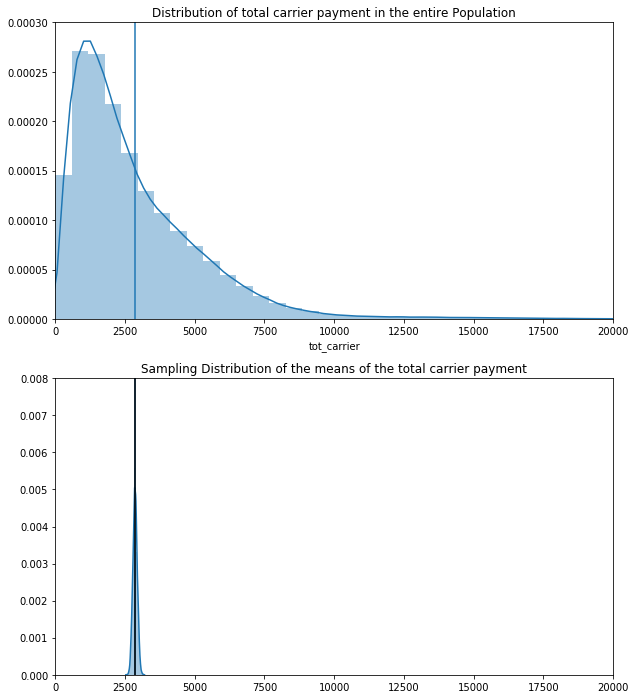

In [68]:


numberSamples = 5000


mean_distribution = np.empty(numberSamples)
for i in range(numberSamples):
    random_samples = rendiab_df.sample(int(rendiab_df.shape[0]*0.001))
    mean_distribution[i] = np.mean(random_samples['tot_carrier'])
plt.figure(figsize=(10,12))


plt.subplot(2,1,1)
sns.distplot(rendiab_df['tot_carrier'])
plt.title("Distribution of total carrier payment in the entire Population")
plt.axvline(x = np.mean(rendiab_df['tot_carrier']))
plt.xlim([0,20000])
plt.ylim([0,0.00030])
plt.subplot(2,1,2)
sns.distplot(mean_distribution)
plt.title("Sampling Distribution of the means of the total carrier payment")
plt.axvline(x = np.mean(rendiab_df['tot_carrier']))
plt.axvline(x = np.mean(mean_distribution), color = "black")
plt.xlim([0,20000])
plt.ylim([0,0.008])
plt.show()

<b>Observation</b>: We can see from the above two distribution plots that the average of the sampling distribution is equal to the average  of the population total carrier payment as stated by the Central limit theorem.

# Confidence Interval: 
From the point estimate which is the sample statistic (such as mean, proportion, difference in population mean or proportion, etc) observed, we can estimate the population parameter with a certain confidence level. Based on the confidence level needed, the population parameter is estimated with a certain margin of error. This generates a confidence interval for the population parmater. The general form of equation for a confidence interval is:

<center><b>Confidence Interval = Best Estimate +/- Margin of Error <b></center>

* Best Estimate = Unbiased Point Estimate
* Margin of Error = "a few" Estimated Standard Errors
* "a few" = Multiplier from appropriate distribution based on desired confidence level and sample design.

In this project we will use a 95% confidence level (0.05 significance) for making confidence interval to estimate population parameter. 

# Hypothesis Testing:
Hypothesis testing is a critical tool in determining what the value of a parameter could be. The basis of our testing has two attributes: 
* Null Hypothesis 
* Alternative Hypothesis. 
The alternative hypothesis is based on the observed sample statistic. The null hypothesis states the opposite of the alternative hypothesis and we try to gather evidence to reject the null hypothesis. 
* We never try to prove the alternative hypothesis. 
* Once the null hypothesis gets rejected with a certain significance level, then the alternative hypothesis automatically gets accepted. 
* The null hypothesis is rejected with a certain significance level. This significance level is the Type 1 error, i.e. the error in rejecting the null hypothesis under the conditions that the null hypothesis was true. 
* In this project, the hypothesis testing will be done with a 0.05 significance level which is 5% type 1 error.
* The hypothesis testing is done by calculating the test statistic, refered as t statistic in this project, which is interpreted as how many standard errors away is the observed value for the same from the hypothetical value taken as mean.

<center><b>test-statistic = (Best Estimate − Hypothesized Estimate) / Standard Error of Estimate</center></b>

The p-value will be calculated to show the probability of the observed test statistic when the null hypothesis is true.

### Sample Proportion of Males and Females diagnosed with diabetes

In [69]:
# dropna drops cases where either variable is missing
dx = rd_sample[["diabetes1", "sex1"]].dropna()  
pd.crosstab(dx.diabetes1, dx.sex1)

sex1,Female,Male
diabetes1,,
No,1872,1340
Yes,51797,36580


In [70]:
#pd.crosstab(dx.diabetes1, dx.sex1).apply(lambda r: r/r.sum(), axis=1)
dz = dx.groupby(dx.sex1).agg({"diabetes1": [lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
sex1,,
Female,0.965120,53669
Male,0.964662,37920


<b>Inference:</b> Based on observed sample statistic, we can see that more than 50% of females diagnosed had diabetes. 

#### Hypothesis Testing

<b>Claim:</b> In the population that filed for medicare claims Population proportion of females having diabetes is more than 50%. We will perform hypothesis test to check this claim. 

We will state the null hypothesis as the female population proportion to be equal to 50% and assume that the null hypothesis is true. 
Our original claim that checks whether the female population proportion being more than 50% will be stated as the alternative hypothesis.

<b>Population:</b> Females who filed Medicare claims.

<b>Parameter of Interest:</b> p (Proportion)

<b>Data:</b> Out of 53724 (51850 + 1874) females 51850 were diagnosed with diabetes. 

#### Null Hypothesis: 50% of the Female population of USA that filed Medicare claims in 2008 have Diabetes.
#### Alternative Hypothesis: More than 50% of Female population of USA that filed Medicare claims in 2008 have Diabetes.

Conducting Hypothesis Test to check if the population proportion of females having diabetes is 50% at a significance level of 0.05

In [71]:
#Calculating the test statistic and p-value to perform the hypothesis test using the 
# function from statsmodels library in python
#sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')
sm.stats.proportions_ztest(51850, 51850+1874, 0.5, alternative = 'larger')

(587.5657792313942, 0.0)

<b>Inference:</b> The t statistic obtained is way too big and the p-value calculated is 0.0 which is less than 0.05, therefore, the probability of seeing the observed proportion of females with diabetes under the conditions that the null hypotheis is true is highly unlikely. Therefore, we have enough evidence to reject the null hypothesis.

### Estimating Population proportion of Female population that have diabetes from the sample.

#### Calculating 95% confidence interval for the proportion of females who have diabetes:

In [72]:
#Calculating the confidence interval for the population proportion
#using the statsmodels library in python
#ci_low, ci_upp = proportion_confint(count, nobs, alpha=0.05, method='normal')
sm.stats.proportion_confint(51850, 51850+1874) 

(0.9635664999476935, 0.9666695211974184)

<b>Inference:</b> From the 95% confidence interval generated, we can say that we are 95% confident that the population proportion of females with diabetes is going to  be  between 96.36% to 96.67%, i.e. if the test was repeated multiple times by resampling from the population, then 95% of the confidence intervals generated will contain the population proportion of females with diabetes.

### Determine if the population proportion of females and males diagnosed with diabetes is same

From proportions calculated using contingency table (crosstab) above, we can also see that the observed sample proportion of male and females diagnosed with diabetes is approximately same. We do a hypothesis test to determine if the population proportion of females and males diagnosed with diabetes is same. This time, we state our claim as the null hypothesis.

#### Null Hypothesis: The proportion of male population and female population who have been diagnosed with diabetes in US and had filed Medicare claims in 2008 is same.
#### Alternative Hypotheis: The proportion of male population and female population who have been diagnosed with diabetes in US and had filed Medicare claims in 2008 is significantly different.

In [73]:
#Replacing column values for diabetic females from Yes to 1 and No to 0
female_dx = dx.loc[dx['sex1']=='Female', 'diabetes1'].replace({'Yes':1, 'No': 0})
female_dx.head()

0    1
3    1
5    1
6    1
8    1
Name: diabetes1, dtype: int64

In [74]:
#Replacing column values for diabetic males from Yes to 1 and No to 0
male_dx = dx.loc[dx['sex1']=='Female', 'diabetes1'].replace({'Yes':1, 'No': 0})
male_dx.head()

0    1
3    1
5    1
6    1
8    1
Name: diabetes1, dtype: int64

In [75]:
#Performing hypothesis test to calculate t-statistic and two-tailed p-value using statsmodels library
#The function returns three values: 
#(a) test statisic, (b) p-value of the t-test, and (c) degrees of freedom used in the t-test.
sm.stats.ttest_ind(female_dx, male_dx) 

(0.0, 1.0, 107336.0)

<b>Inference:</b> From the hypothesis test performed at 0.05 significance level , the p-value obtained is 1.0 which is significantly large. Thereofore, the probability of observing the t-statistic is highly likely under the given conditions of null hypothesis being true. Therefore, we don't have sufficient evidence to reject the null hypothesis and thus, we fail to reject the null hypotheis.

### Difference in proportion of Female and Male Population who have been diagnosed with Diabetes.

#### Difference of two population proportions: Male and Female Diabetic Patients
<b>Population:</b> Females dialgnosed with diabetes who filed mediclaim, and males diagnosed with diabetes who filed mediclaim


In [76]:
p = dz.Proportion.Female #Proportion of female population with diabetes
n = dz.Total_n.Female #Total number of female in the sample 
se_female = np.sqrt(p * (1 - p)/n) #Standard error for the female population
se_female

0.0007919904972478321

In [77]:
p = dz.Proportion.Male #Proportion of male population with diabetes
n = dz.Total_n.Male #Total number of male in the sample
se_male = np.sqrt(p * (1 - p)/ n) #Standard error for the male population
se_male

0.0009481384452217199

In [78]:
#Estimated standard error for difference in population proportion
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.001235400930483027

In [79]:
#Creating a 95% confidence interval for the difference in population proportion 
#for male and female diabetic patients.
#d = population proportion of females - population proportion of males
d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 1.96 * se_diff
ucb = d + 1.96 * se_diff
(lcb, ucb)

(-0.0019643041165514604, 0.0028784675309420056)

<b>Inference:</b> 
* From the 95% confidence interval generated, we can say that we are 95% confident that the difference in proportion of male and female populations with diabetes is going to be between -0.0011 to 0.0036, i.e. if the test was repeated multiple times by resampling from the population, then 95% of the confidence intervals generated will contain the population proportion of females with diabetes. 
* This also confirms the result of our hypothesis test that the proportion of male and female population diagnosed with diabetes is the same as 0 lies in the range of expected values for the difference in proportion of male and female population with diabetes.

### Startifying data and comparing propotions within bands

Since proportion of diabetic patients can vary strongly with age, it might be more informative to stratify the data into homogeneous age bands and compare the proportions of female and male diabetic patients within each age band. The data has been displayed as a plot, with the difference in proportions plotted as a curve. The confidence intervals is represented as  a "confidence band" around the estimates.

In [80]:
#Stratifying the sample data across different age groups.
rd_sample["agegrp"] = pd.cut(rd_sample['Age'], [18, 30, 40, 50, 60, 70, 80, 90, 100])
rd_sample.head()

,renal_disease1,diabetes1,sex1,race1,tot_inpatient,tot_outpatient,tot_carrier,Age,agegrp
0,No,Yes,Female,White,0.0,30.0,5540.0,75,"(70, 80]"
1,No,Yes,Male,White,0.0,70.0,1520.0,77,"(70, 80]"
2,No,Yes,Male,White,0.0,1870.0,3820.0,68,"(60, 70]"
3,No,Yes,Female,White,0.0,0.0,2670.0,79,"(70, 80]"
4,No,Yes,Male,White,0.0,80.0,3780.0,93,"(90, 100]"


             Female      Male
agegrp                       
(18, 30]   0.975904  0.951807
(30, 40]   0.971338  0.968160
(40, 50]   0.970449  0.968300
(50, 60]   0.969012  0.963569
(60, 70]   0.962652  0.963067
(70, 80]   0.965515  0.964329
(80, 90]   0.964200  0.966830
(90, 100]  0.966555  0.966814
           Female   Male
agegrp                  
(18, 30]      332    332
(30, 40]      942    848
(40, 50]     1895   1735
(50, 60]     3098   2690
(60, 70]    13120  10343
(70, 80]    18124  13260
(80, 90]    12570   7356
(90, 100]    3588   1356


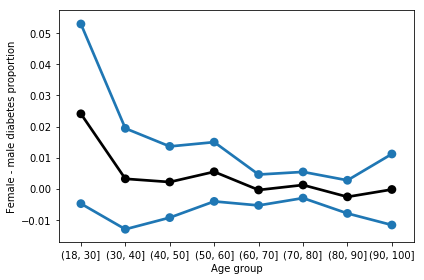

In [81]:
pr = rd_sample.groupby(["agegrp", "sex1"]).agg({"diabetes1": lambda x: np.mean(x=="Yes")}).unstack()

pr.columns = ["Female", "Male"]
print(pr)
# The number of people for each calculated proportion
dn = rd_sample.groupby(["agegrp", "sex1"]).agg({"diabetes1": np.size}).unstack()
dn.columns = ["Female", "Male"]
print(dn)
# Standard errors for each proportion
se = np.sqrt(pr * (1 - pr) / dn)

# Standard error for the difference in female/male diabetic proportion in every age band
se_diff = np.sqrt(se.Female**2 + se.Male**2)

# Standard errors for the difference in smoking rates between genders, within age bands

# The difference in male and female population proportion of diabetic patients.
pq = pr.Female - pr.Male

x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
sns.pointplot(x, pq - 2*se_diff)
sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male diabetes proportion")
plt.tight_layout()

<b>Observation:</b> From the pointplot, it can be observed that with increase in age the female population proportion of diabetic patients is slightly more than male population proportion of diabetic patients.

### Analysing payment claims for different ethnic groups

In [82]:
rd_sample['total_pay'] = rd_sample['tot_inpatient'] + rd_sample['tot_outpatient'] + rd_sample['tot_carrier']
rd_sample.head()

,renal_disease1,diabetes1,sex1,race1,tot_inpatient,tot_outpatient,tot_carrier,Age,agegrp,total_pay
0,No,Yes,Female,White,0.0,30.0,5540.0,75,"(70, 80]",5570.0
1,No,Yes,Male,White,0.0,70.0,1520.0,77,"(70, 80]",1590.0
2,No,Yes,Male,White,0.0,1870.0,3820.0,68,"(60, 70]",5690.0
3,No,Yes,Female,White,0.0,0.0,2670.0,79,"(70, 80]",2670.0
4,No,Yes,Male,White,0.0,80.0,3780.0,93,"(90, 100]",3860.0


In [83]:
# Dropping renal disease1 column from sample dataframe to analyze 
# the diabetes1  column and make inferential statements about the population
# that were diagnosed with diabetes
rd_diab = rd_sample[rd_sample['diabetes1']=='Yes'].drop('renal_disease1', axis = 1).reset_index(drop=True)
rd_diab.groupby('race1').agg({'tot_inpatient': np.mean})


,tot_inpatient
race1,
Black,6456.283779
Hispanic,4877.074715
Unknown,4989.388918
White,5692.505287


<b>Observation:</b> From the sample statistic it is observed that black population pays more average total inpatient amount for diabetes compared to all the other ethnic groups. 

## Difference in Population mean
To confirm our above observation, further we try to perform three different hypothesis tests to find out if the black population pays more total inpatient amount on an average for diabetes compared to the other three ethnic groups (White, Hispanic and Unknown). This time the claim is stated as the alternative hypothesis.
#### Null Hypothesis: On an average, the population of black ethnic group claimed same amount  of total inpatient amount as medicare claims as the Hispanic group for Diabetes in US in the year 2008.
#### Alternative Hypothesis: On an average, the population of black ethnic group claimed more total inpatient amount as medicare claims than the Hispanic group for Diabetes in US in the year 2008.

When performing two-sample mean testing it is important to check for "heteroscedasticity", means that the variances within the two groups (sub-populations) being compared may be different. Based on the difference in variance between two groups, the two different approaches are used for performing the hypothesis test, either the pooled approach or unequal approach

In [84]:
diab_group = rd_diab[['tot_inpatient', 'race1']]
diab_group.head()

,tot_inpatient,race1
0,0.0,White
1,0.0,White
2,0.0,White
3,0.0,White
4,0.0,White


In [85]:
hispanic_diab_in_pay = diab_group.loc[diab_group['race1'] == 'Hispanic', 'tot_inpatient'].reset_index(drop=True)
hispanic_diab_in_pay.head()

0        0.0
1    13048.0
2    68472.0
3        0.0
4        0.0
Name: tot_inpatient, dtype: float64

In [86]:
black_diab_in_pay = diab_group.loc[diab_group['race1'] == 'Black', 'tot_inpatient'].reset_index(drop=True)
black_diab_in_pay.head()

0        0.0
1        0.0
2        0.0
3        0.0
4    26192.0
Name: tot_inpatient, dtype: float64

In [87]:
diab_group.groupby(["race1"])["tot_inpatient"].std()

race1
Black       15311.893048
Hispanic    13769.003072
Unknown     13250.828307
White       14136.151637
Name: tot_inpatient, dtype: float64

We observe that the Standard deviation of black and hispanic groups are quite different. Therfore we will use the unequal approach for calculating the standard error.

In [88]:
black_diab_in_pay1 = sm.stats.DescrStatsW(black_diab_in_pay)
hispanic_diab_in_pay1 = sm.stats.DescrStatsW(hispanic_diab_in_pay)
print("unequal:", sm.stats.CompareMeans(black_diab_in_pay1, hispanic_diab_in_pay1).ztest_ind(usevar='unequal'))


unequal: (5.300383855657883, 1.1555946022938312e-07)


<b>Inference:</b> The p-value obtained by hypothesis testing is much smaller than 0.05, which is the significance level for this test. Therefore, the probabibility of seeing the observed t-statistic under the conditions that null hypothesis is rare. Therefore, we have enough evidence to reject the null hypothesis as there is a significant difference between the average total inpatient payment made by black and hispanic group for diabetes with black paying more than hispanic group.

#### Null Hypothesis: On an average, the population of black ethnic group in US claimed same amount  of total inpatient medicare claims as white group for Diabetes in US in the year 2008.
#### Alternative Hypothesis: On an average, the population of black ethnic group claimed more amount of total inpatient amount medicare claims than the white group for Diabetes in US in the year 2008.

In [89]:
white_diab_in_pay = diab_group.loc[rd_sample['race1'] == 'White', 'tot_inpatient']
white_diab_in_pay.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: tot_inpatient, dtype: float64

Since there is difference in the variance of the two groups, we use the unequal approach for the hypothesis testing. 

In [90]:
black_diab_in_pay1 = sm.stats.DescrStatsW(black_diab_in_pay)
white_diab_in_pay1 = sm.stats.DescrStatsW(white_diab_in_pay)
print("unequal:", sm.stats.CompareMeans(black_diab_in_pay1, white_diab_in_pay1).ztest_ind(usevar='unequal'))


unequal: (4.347849461158795, 1.3747891039695909e-05)


<b>Inference:</b> The p-value obtained by hypothesis testing is much smaller than 0.05 which is the significance level for this test. Therefore, the probabibility of seeing the observed t-statistic under the conditions that null hypothesis is highly unlikely and rare. Therefore, we have enough evidence to reject the null hypothesis as there is a significant difference between the average total inpatient payment made by black and white group with black paying more than white group.

#### Null Hypothesis: On an average, the population of black ethnic group claimed same amount  of total inpatient amount as medicare claims than other unknown groups for Diabetes in US in the year 2008.
#### Alternative Hypothesis: On an average, the population of black ethnic group claimed more total inpatient amount as medicare claims than the other unknown groups for Diabetes in US in the year 2008.

In [91]:
other_diab_in_pay = diab_group.loc[rd_sample['race1'] == 'Unknown', 'tot_inpatient']
other_diab_in_pay.head()

47        0.0
86        0.0
151       0.0
173    8024.0
191       0.0
Name: tot_inpatient, dtype: float64

Since there is difference in the variance of the two groups, we use the unequal approach for the hypothesis testing. 

In [92]:
black_diab_in_pay1 = sm.stats.DescrStatsW(black_diab_in_pay)
other_diab_in_pay1 = sm.stats.DescrStatsW(other_diab_in_pay)
print("unequal:", sm.stats.CompareMeans(black_diab_in_pay1, other_diab_in_pay1).ztest_ind(usevar='unequal'))


unequal: (1.0963822491837916, 0.27291152879445546)


<b>Inference:</b> The p-value obtained by hypothesis testing is much smaller than 0.05 which is the significance level for this test. Therefore, the probabibility of seeing the observed t-statistic under the conditions that null hypothesis is very rare. Therefore, we have enough evidence to reject the null hypothesis as there is a significant difference between the average total inpatient payment made by black and other unknown group with black paying more than other group.

<b>Observation:</b> Also, from above three hypothesis testing, it is evident that black population pays more than rest of the ethnic groups for diabetes. 

### How payments of ethnic groups vary for renal disease. 

We can see that the black population claims more for total inpatient payment on average than other ethnic groups for renal disease as well. But we will check that with hypothesis testing at a significance level of 0.05.

In [93]:
# Dropping diabetes1 column from sample dataframe to analyze 
# the renal disease1  column to make inferential statements about the population
# that were diagnosed with renal disease 
renal_group = rd_sample[rd_sample['renal_disease1']=='Yes'].drop('diabetes1', axis = 1).reset_index(drop=True)
renal_group.groupby('race1').agg({'tot_inpatient': np.mean})

,tot_inpatient
race1,
Black,13585.108030
Hispanic,10308.122677
Unknown,11141.085106
White,11467.253260


In [94]:
renal_group =  renal_group[['tot_inpatient', 'race1']]
renal_group.head()

,tot_inpatient,race1
0,21072.0,White
1,0.0,White
2,0.0,White
3,0.0,White
4,4024.0,Black


In [95]:
hispanic_renal_in_pay = renal_group.loc[renal_group['race1'] == 'Hispanic', 'tot_inpatient'].reset_index(drop=True)
hispanic_renal_in_pay.head()

0    68472.0
1        0.0
2        0.0
3        0.0
4     9248.0
Name: tot_inpatient, dtype: float64

In [96]:
black_renal_in_pay = renal_group.loc[renal_group['race1'] == 'Black', 'tot_inpatient'].reset_index(drop=True)
black_renal_in_pay.head()

0     4024.0
1    26192.0
2    30014.0
3     1024.0
4        0.0
Name: tot_inpatient, dtype: float64

#### Let's check for the difference in variance of total inpatient payment in different ethnic groups.

In [97]:
renal_group.groupby(["race1"])["tot_inpatient"].std()

race1
Black       23041.456365
Hispanic    19976.995569
Unknown     20216.249647
White       20715.425854
Name: tot_inpatient, dtype: float64

<b>Observation:</b> From the sample statistic it is observed that black population pays more average total inpatient amount for renal disease compared to all the other ethnic groups. We try to perform three different hypothesis tests to find out if the black population pays more total inpatient amount on an average for renal disease compared to the other three ethnic groups (White, Hispanic and Unknown). This time the claim is stated as the alternative hypothesis.

#### Null Hypothesis: On an average, the population of black ethnic group claimed same amount  of total inpatient amount as medicare claims as the Hispanic group for Renal disease in US in the year 2008.
#### Alternative Hypothesis: On an average, the population of black ethnic group claimed more total inpatient amount as medicare claims than the Hispanic group for Renal disease in US in the year 2008.

Since the difference in variance across the different ethnic groups is not very significant, we can use either of two approaches for calculating the estimated standard error for hypotheis testing.

In [98]:
black_renal_in_pay1 = sm.stats.DescrStatsW(black_renal_in_pay)
hispanic_renal_in_pay1 = sm.stats.DescrStatsW(hispanic_renal_in_pay)
print("unequal:", sm.stats.CompareMeans(black_renal_in_pay1, hispanic_renal_in_pay1).ztest_ind(usevar='unequal'))
print("pooled:", sm.stats.CompareMeans(black_renal_in_pay1, hispanic_renal_in_pay1).ztest_ind(usevar='pooled'))

unequal: (3.2003101104171, 0.0013727979481168036)
pooled: (2.969957530815011, 0.0029784092155146808)


<b>Inference:</b> The p-value obtained by hypothesis testing is much smaller than 0.05 which is the significance level for this test. Therefore, the probabibility of seeing the observed t-statistic under the conditions that null hypothesis is very rare. Therefore, we have enough evidence to reject the null hypothesis as there is a significant difference between the average total inpatient payment made by black and hispanic group for renal disease with black paying more than hispanic group.

#### Null Hypothesis: On an average, the population of black ethnic group claimed same amount  of total inpatient amount as medicare claims as the white group for Renal disease in US in the year 2008.
#### Alternative Hypothesis: On an average, the population of black ethnic group claimed more total inpatient amount for medicare claims than the white group for Renal disease in US in the year 2008.

In [99]:
white_renal_in_pay = renal_group.loc[renal_group['race1'] == 'White', 'tot_inpatient']
white_renal_in_pay.head()

0    21072.0
1        0.0
2        0.0
3        0.0
5        0.0
Name: tot_inpatient, dtype: float64

Since there is not a significant difference in the variance of the two groups, we can use both the pooled and unequal approach for the hypothesis testing. 

In [100]:
black_renal_in_pay1 = sm.stats.DescrStatsW(black_renal_in_pay)
white_renal_in_pay1 = sm.stats.DescrStatsW(white_renal_in_pay)
print("unequal:", sm.stats.CompareMeans(black_renal_in_pay1, hispanic_renal_in_pay1).ztest_ind(usevar='unequal'))
print("pooled:", sm.stats.CompareMeans(black_renal_in_pay1, hispanic_renal_in_pay1).ztest_ind(usevar='pooled'))

unequal: (3.2003101104171, 0.0013727979481168036)
pooled: (2.969957530815011, 0.0029784092155146808)


<b>Inference:</b> The p-value obtained by hypothesis testing is much smaller than 0.05 which is the significance level for this test. Therefore, the probabibility of seeing the observed t-statistic under the conditions that null hypothesis is rare. Therefore, we have enough evidence to reject the null hypothesis as there is a significant difference between the average total inpatient payment made by black and white group for renal disease with black paying more than white group.

#### Null Hypothesis: On an average, the population of black ethnic group claimed same amount  of total inpatient amount for medicare claims as other unknown groups for Renal disease in US in the year 2008.
#### Alternative Hypothesis: On an average, the population of black ethnic group claimed more total inpatient amount for medicare claims than the other unknown groups for Renal disease in US in the year 2008.

In [101]:
other_renal_in_pay = renal_group.loc[renal_group['race1'] == 'Unknown', 'tot_inpatient']
other_renal_in_pay.head()

59         0.0
225    57348.0
292    13024.0
297    12048.0
334        0.0
Name: tot_inpatient, dtype: float64

Since there is not a significant difference in the variance of the two groups, we can use both the pooled and unequal approach for the hypothesis testing. 

In [102]:
black_renal_in_pay1 = sm.stats.DescrStatsW(black_renal_in_pay)
other_renal_in_pay1 = sm.stats.DescrStatsW(other_renal_in_pay)
print("unequal:", sm.stats.CompareMeans(black_renal_in_pay1, other_renal_in_pay1).ztest_ind(usevar='unequal'))
print("pooled:", sm.stats.CompareMeans(black_renal_in_pay1, other_renal_in_pay1).ztest_ind(usevar='pooled'))

unequal: (2.0702650635847544, 0.0384275293126453)
pooled: (1.9036983817461817, 0.05694947732252491)


<b>Inference:</b> The p-value obtained by hypothesis testing is larger than 0.05 which is the significance level for this test. Therefore, the probabibility of seeing the observed t-statistic under the conditions that null hypothesis is true. Therefore, we do not have enough evidence to reject the null hypothesis.

Also this makes it more evident that black population claims more total inpatient fees for both diabetes and renal disease as compared to the rest of the other ethnic groups except for the 'other unkown' group where the difference between black patient claims and 'other unknown' patient claims do not seem to have a significant difference for renal disease. 

#### Now let's compare the total payment for diabetes as compared to renal disease.

In [103]:
rd_pay = rd_sample.loc[rd_sample['diabetes1']=='Yes', 'total_pay']
rd_pay.head()

0    5570.0
1    1590.0
2    5690.0
3    2670.0
4    3860.0
Name: total_pay, dtype: float64

In [104]:
rd_pay.mean() # Average total payment for Diabetes

10303.136268486145

In [105]:
rn_pay = rd_sample.loc[rd_sample['renal_disease1']=='Yes', 'total_pay']
rn_pay.head()

6     27062.0
7      1850.0
13    31030.0
19    12530.0
21     5074.0
Name: total_pay, dtype: float64

In [106]:
rn_pay.mean()

19439.759622367466

In [107]:
rn_pay.mean() - rd_pay.mean() # Difference in Average payment for two groups

9136.623353881321

<b>Observation:</b> It is observed that on an average more total payment goes towards Renal disease claims rather than diabetes claims. But we must perform a hypothesis test to confirm with a significance level of 0.05 where we state our claim as the alternative hypothesis.

#### Null Hypothesis: On an average the total payment medicare claims for renal disease is same as the total payment medicare claims for diabetes in US in the year 2008.
#### Alternative Hypothesis: On an average the total payment medicare claims for renal disease is more than the total payment medicare claims for diabetes in US in the year 2008.

In [108]:
rd_pay = rd_sample.loc[rd_sample['diabetes1']=='Yes', 'total_pay']
rd_pay.std()

16298.110070343604

In [109]:
rn_pay = rd_sample.loc[rd_sample['renal_disease1']=='Yes', 'total_pay']
rn_pay.std()

24486.10421045009

Since there is a significant difference in the variance of two groups with diabetes and with renal disease, we will use the unequal approach for calculating the standard error for hypothesis testing.

In [110]:
rd_pay1 = sm.stats.DescrStatsW(rd_pay)
rn_pay1 = sm.stats.DescrStatsW(rn_pay)
print("unequal:", sm.stats.CompareMeans(rn_pay1, rd_pay1).ztest_ind(usevar='unequal'))


unequal: (46.093807937861364, 0.0)


<b>Inference:</b> The observed p-value of 0.0 is less than the significance level of 0.05. Therefore, the probability of seeing the observed t-statistic of 45.9 under the conditions that null hypothesis is true is highly unlikely. Therefore, we have enough evidence to reject the null hypothesis as the average total payment for renal disease is greater than the average total payment for diabetes. 

## Conclusion:
1. Based on 95% confidence interval and the hypothesis testing performed at 0.05 significance level, the proportion of female population with diabetes is greater than 50%. The 95% confidence interval of female proportion with diabetes is between  96.36% to 96.67%.
2. From the 95% confidence interval generated, we can say that we are 95% confident that the difference in proportion of male and female population with diabetes is going to be between -0.0011 to 0.0036. Since 0.0 lies in the expected range of values, there is not a significant difference in proportion of female and male population with diabetes. 
3. Black population on an average pays more total inpatient fees compared to all the other ethnic groups.
4. The difference in the proportion of female and male population with diabetes increases slightly with age.
5. The average total payment claim for renal disease is greater than for diabetes.